**Atividade 17/09/2025: Jogos Olímpicos**

- Caroline Souza: 2115080003
- Yara de Oliveira: 2115080056

Exploração de Dados dos Jogos Olímpicos

- Dados históricos (1896–2022):
  https://basedosdados.org/dataset/62f8cb83-ac37-48be-874b-b94dd92d3e2b
- Dados Paris 2024:
  https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games/data

In [ ]:
# @title 1. Configuração do Ambiente e Instalação de Bibliotecas
# ------------------------------------------------------------------
# Célula 1: Instala as bibliotecas necessárias para o projeto
# ------------------------------------------------------------------
!pip install basedosdados pandas pyarrow matplotlib seaborn kaggle kagglehub -q

print("Bibliotecas instaladas com sucesso!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.46.0 requires tomlkit<0.14.0,>=0.12.0, but you have tomlkit 0.11.8 which is incompatible.
Bibliotecas instaladas com sucesso!


In [ ]:
# @title 2. Criação da Estrutura do Data Lake
# ------------------------------------------------------------------
# Célula 2: Cria a estrutura de diretórios para organizar os dados
# ------------------------------------------------------------------
import os

# Estrutura principal
os.makedirs("olympics-datalake/raw", exist_ok=True)
os.makedirs("olympics-datalake/bronze", exist_ok=True)

# Estrutura da camada Gold para as análises
os.makedirs("olympics-datalake/gold/analise_medalhas", exist_ok=True)
os.makedirs("olympics-datalake/gold/analise_modalidades", exist_ok=True)
os.makedirs("olympics-datalake/gold/analise_genero", exist_ok=True)

print("Estrutura de diretórios do Data Lake criada com sucesso em 'olympics-datalake/'.")
!ls -R olympics-datalake/

Estrutura de diretórios do Data Lake criada com sucesso em 'olympics-datalake/'.
olympics-datalake/:
bronze	gold  raw

olympics-datalake/bronze:

olympics-datalake/gold:
analise_genero	analise_medalhas  analise_modalidades

olympics-datalake/gold/analise_genero:

olympics-datalake/gold/analise_medalhas:

olympics-datalake/gold/analise_modalidades:

olympics-datalake/raw:


In [ ]:
# @title 3. Ingestão de Dados (Camada Raw)
# ------------------------------------------------------------------
import kagglehub
import pandas as pd
import json
from datetime import date
import os
import shutil

# --- 3.1 Configuração da API do Kaggle ---
print("Configurando a API do Kaggle...")
if not os.path.exists("kaggle.json"):
    print("ERRO: Arquivo 'kaggle.json' não encontrado. Faça o upload do arquivo para continuar.")
else:
    !mkdir -p ~/.kaggle
    !cp kaggle.json ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json
    print("API do Kaggle configurada.")

    # --- 3.2 Download dos Dados Históricos (Kaggle) ---
    print("\nBaixando dados históricos do Kaggle...")
    path_historico_dir = kagglehub.dataset_download("josephcheng123456/olympic-historical-dataset-from-olympediaorg")

    files_to_copy = {
        'Olympic_Athlete_Event_Results.csv': 'olympics_historico_results.csv',
        'Olympic_Athlete_Bio.csv': 'olympics_historico_bio.csv'
    }

    copied_count = 0
    for root, dirs, files in os.walk(path_historico_dir):
        for original_name, new_name in files_to_copy.items():
            if original_name in files and not os.path.exists(os.path.join('olympics-datalake/raw', new_name)):
                source_path = os.path.join(root, original_name)
                dest_path = os.path.join('olympics-datalake/raw', new_name)
                shutil.copy(source_path, dest_path)
                print(f"Arquivo '{original_name}' copiado.")
                copied_count += 1

    if copied_count > 0:
        print(f"Cópia de {copied_count} arquivos históricos concluída.")
    else:
        print("Arquivos históricos já estavam presentes ou não foram encontrados.")


    # --- 3.3 Download dos Dados de Paris 2024 (Kaggle) ---
    print("\nBaixando dados de Paris 2024 do Kaggle...")
    path_paris_dir = kagglehub.dataset_download("piterfm/paris-2024-olympic-summer-games")

    files_copied = 0
    for root, dirs, files in os.walk(path_paris_dir):
        for filename in files:
            if filename.endswith(".csv"):
                dest_file_paris = f'olympics-datalake/raw/paris2024_{filename}'
                if not os.path.exists(dest_file_paris):
                    source_file_paris = os.path.join(root, filename)
                    shutil.copy(source_file_paris, dest_file_paris)
                    files_copied += 1
    if files_copied > 0:
        print(f"Cópia de {files_copied} novos arquivos de Paris 2024 concluída.")

# --- 3.4 Criação dos Metadados (JSON) ---
today = date.today().strftime("%Y-%m-%d")
metadata_historico = {
    "Nome do dataset": "Olympic Games Historical", "Fonte": "Kaggle",
    "Link": "https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg",
    "Descrição": "Dataset relacional com resultados, biografias de atletas, etc.", "Campos principais": ["athlete_id", "edition", "sport", "medal", "sex"],
    "Data de coleta": today, "Observações": "Utiliza múltiplos arquivos que são unidos na camada bronze."
}
metadata_paris2024 = {
    "Nome do dataset": "Paris 2024 Olympic Summer Games", "Fonte": "Kaggle",
    "Link": "https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games",
    "Descrição": "Coleta de dados sobre os Jogos Olímpicos de Paris 2024.", "Campos principais": ["Name", "NOC", "Discipline"],
    "Data de coleta": today, "Observações": "Contém múltiplos arquivos, como 'medals.csv', 'athletes.csv', etc."
}
with open('olympics-datalake/raw/olympics_historico.json', 'w', encoding='utf-8') as f: json.dump(metadata_historico, f, indent=4, ensure_ascii=False)
with open('olympics-datalake/raw/olympics_paris2024.json', 'w', encoding='utf-8') as f: json.dump(metadata_paris2024, f, indent=4, ensure_ascii=False)

print("\nArquivos de metadados criados na camada RAW.")
print("\nConteúdo final da camada RAW:")
!ls olympics-datalake/raw

Configurando a API do Kaggle...
API do Kaggle configurada.

Baixando dados históricos do Kaggle...
Using Colab cache for faster access to the 'olympic-historical-dataset-from-olympediaorg' dataset.
Arquivo 'Olympic_Athlete_Event_Results.csv' copiado.
Arquivo 'Olympic_Athlete_Bio.csv' copiado.
✅ Cópia de 2 arquivos históricos concluída.

Baixando dados de Paris 2024 do Kaggle...
Using Colab cache for faster access to the 'paris-2024-olympic-summer-games' dataset.
✅ Cópia de 58 novos arquivos de Paris 2024 concluída.

Arquivos de metadados criados na camada RAW.

Conteúdo final da camada RAW:
 olympics_historico_bio.csv	        paris2024_Judo.csv
 olympics_historico.json	       'paris2024_Marathon Swimming.csv'
 olympics_historico_results.csv         paris2024_medallists.csv
 olympics_paris2024.json	        paris2024_medals.csv
'paris2024_3x3 Basketball.csv'	        paris2024_medals_total.csv
 paris2024_Archery.csv		       'paris2024_Modern Pentathlon.csv'
'paris2024_Artistic Gymnastics.

In [ ]:
# @title Criação dos Metadados da Camada RAW

# --- 3.4 Criação dos Metadados (JSON) ---
today = date.today().strftime("%Y-%m-%d")

# Define o conteúdo do metadado para o dataset histórico
metadata_historico = {
    "Nome do dataset": "Olympic Games Historical",
    "Fonte": "Kaggle",
    "Link": "https://www.kaggle.com/datasets/josephcheng123456/olympic-historical-dataset-from-olympediaorg",
    "Descrição": "Dataset relacional com resultados, biografias de atletas, etc.",
    "Campos principais": ["athlete_id", "edition", "sport", "medal", "sex"],
    "Data de coleta": today,
    "Observações": "Utiliza múltiplos arquivos que são unidos na camada bronze."
}

# Define o conteúdo do metadado para o dataset de Paris 2024
metadata_paris2024 = {
    "Nome do dataset": "Paris 2024 Olympic Summer Games",
    "Fonte": "Kaggle",
    "Link": "https://www.kaggle.com/datasets/piterfm/paris-2024-olympic-summer-games",
    "Descrição": "Coleta de dados sobre os Jogos Olímpicos de Paris 2024.",
    "Campos principais": ["Name", "NOC", "Discipline"],
    "Data de coleta": today,
    "Observações": "Contém múltiplos arquivos, como 'medals.csv', 'athletes.csv', etc."
}

# Escreve os dicionários em arquivos .json
with open('olympics-datalake/raw/olympics_historico.json', 'w', encoding='utf-8') as f:
    json.dump(metadata_historico, f, indent=4, ensure_ascii=False)
with open('olympics-datalake/raw/olympics_paris2024.json', 'w', encoding='utf-8') as f:
    json.dump(metadata_paris2024, f, indent=4, ensure_ascii=False)

print("\nArquivos de metadados criados na camada RAW.")


Arquivos de metadados criados na camada RAW.


In [ ]:
# @title 4. Processamento e Integração (Camada Bronze)
# ------------------------------------------------------------------
import pandas as pd
import json

# --- 4.1 Carregar, Unir e Processar Dados Históricos ---
df_hist_results = pd.read_csv('olympics-datalake/raw/olympics_historico_results.csv')
df_hist_bio = pd.read_csv('olympics-datalake/raw/olympics_historico_bio.csv')
df_bio_essentials = df_hist_bio[['athlete_id', 'sex']]
df_hist_raw = pd.merge(df_hist_results, df_bio_essentials, on='athlete_id', how='left')
df_hist_raw['ano'] = df_hist_raw['edition'].str[:4].astype(int)
is_summer = df_hist_raw['edition'].str.contains("Summer")
after_1986 = df_hist_raw['ano'] >= 1986
df_hist = df_hist_raw[is_summer & after_1986].copy()
df_hist.rename(columns={
    'country_noc': 'pais', 'sport': 'modalidade', 'athlete': 'atleta_nome',
    'medal': 'medalha', 'sex': 'genero'
}, inplace=True)
df_hist.to_parquet('olympics-datalake/bronze/olympics_historico.parquet')

# --- 4.2 Carregar Dados de Paris 2024 ---
df_paris_athletes = pd.read_csv('olympics-datalake/raw/paris2024_athletes.csv')
df_paris_medals = pd.read_csv('olympics-datalake/raw/paris2024_medals.csv')
print("Arquivos RAW de Paris carregados.")

# --- 4.3 Integração para Análise de Medalhas ---
medals_hist = df_hist.dropna(subset=['medalha'])
medals_hist_agg = medals_hist.groupby(['ano', 'pais']).size().reset_index(name='total_medalhas')
medals_paris_agg = df_paris_medals.groupby('country_code').size().reset_index(name='total_medalhas')
medals_paris = medals_paris_agg.rename(columns={'country_code': 'pais'})
medals_paris['ano'] = 2024
df_medalhas_total = pd.concat([medals_hist_agg, medals_paris], ignore_index=True)
df_medalhas_total.to_parquet('olympics-datalake/bronze/medalhas_1986_2024.parquet')
print("Dataset integrado de medalhas criado.")

# --- 4.4 Integração para Análise de Modalidades (Participantes) ---
part_hist = df_hist.groupby(['ano', 'modalidade'])['athlete_id'].nunique().reset_index(name='num_participantes')

df_paris_athletes['disciplines_list'] = df_paris_athletes['disciplines'].str.strip("[]").str.replace("'", "").str.split(r',\s*')
df_paris_athletes_exploded = df_paris_athletes.explode('disciplines_list')
part_paris = df_paris_athletes_exploded.groupby('disciplines_list')['name'].nunique().reset_index(name='num_participantes')
part_paris.rename(columns={'disciplines_list': 'modalidade'}, inplace=True)
part_paris['ano'] = 2024

df_participantes_total = pd.concat([part_hist, part_paris], ignore_index=True)
df_participantes_total.to_parquet('olympics-datalake/bronze/participantes_1986_2024.parquet')
print("Dataset integrado de participantes criado.")

# --- 4.5 Integração para Análise de Gênero ---
df_hist['genero'] = df_hist['genero'].replace({'Male': 'M', 'Female': 'F'})
gender_hist = df_hist.groupby(['ano', 'modalidade', 'genero'])['athlete_id'].nunique().reset_index(name='num_atletas')
gender_hist_pivot = gender_hist.pivot_table(index=['ano', 'modalidade'], columns='genero', values='num_atletas').fillna(0).reset_index()
gender_hist_pivot.rename(columns={'F': 'Female', 'M': 'Male'}, inplace=True)
df_genero_total = gender_hist_pivot
df_genero_total.to_parquet('olympics-datalake/bronze/genero_historico.parquet')
print("Dataset integrado de gênero criado.")

# --- 4.6 Salvar arquivos Parquet e criar metadados ---
df_paris_athletes.to_parquet('olympics-datalake/bronze/paris2024_athletes.parquet')
df_paris_medals.to_parquet('olympics-datalake/bronze/paris2024_medals.parquet')
bronze_metadata = { "medalhas_1986_2024.parquet": { "Descrição": "Dataset consolidado com o número total de medalhas por país e por ano, de 1986 a 2024.", "Fontes_Originais": ["olympic-historical-dataset-from-olympediaorg", "paris-2024-olympic-summer-games"], "Campos": ["ano", "pais", "total_medalhas"] }, "participantes_1986_2024.parquet": { "Descrição": "Dataset consolidado com o número de atletas únicos por modalidade e por ano.", "Fontes_Originais": ["olympic-historical-dataset-from-olympediaorg", "paris-2024-olympic-summer-games"], "Campos": ["ano", "modalidade", "num_participantes"] }, "genero_historico.parquet": { "Descrição": "Dataset consolidado com a contagem de atletas por gênero ('Female', 'Male'), modalidade e ano. APENAS DADOS HISTÓRICOS.", "Fontes_Originais": ["olympic-historical-dataset-from-olympediaorg"], "Campos": ["ano", "modalidade", "Female", "Male"] } }
for filename, meta in bronze_metadata.items():
    with open(f'olympics-datalake/bronze/{filename.replace(".parquet", ".json")}', 'w', encoding='utf-8') as f: json.dump(meta, f, indent=4, ensure_ascii=False)
print("\nMetadados da camada BRONZE criados.")
!ls olympics-datalake/bronze

Arquivos RAW de Paris carregados.
Dataset integrado de medalhas criado.
Dataset integrado de participantes criado.
Dataset integrado de gênero (APENAS HISTÓRICO) criado.

Metadados da camada BRONZE criados.
genero_historico.json	    paris2024_athletes.parquet
genero_historico.parquet    paris2024_medals.parquet
medalhas_1986_2024.json     participantes_1986_2024.json
medalhas_1986_2024.parquet  participantes_1986_2024.parquet
olympics_historico.parquet


Tabela resumo salva em: olympics-datalake/gold/analise_medalhas/medalhas_summary.csv

Total de Medalhas por País (1986-2024) - Top 10:
  pais  total_medalhas
0  USA            2488
1  AUS            1097
2  CHN            1085
3  GER            1083
4  RUS             854
5  GBR             808
6  FRA             719
7  JPN             629
8  ITA             619
9  NED             599

Média de Medalhas por Edição (Top 10 Países):
  pais  media_medalhas_por_edicao
0  USA                 248.800000
1  RUS                 142.333333
2  GER                 120.333333
3  AUS                 109.700000
4  CHN                 108.500000
5  GBR                  80.800000
6  FRA                  71.900000
7  JPN                  62.900000
8  ITA                  61.900000
9  NED                  59.900000

Gráfico salvo em: olympics-datalake/gold/analise_medalhas/medalhas_plot.png


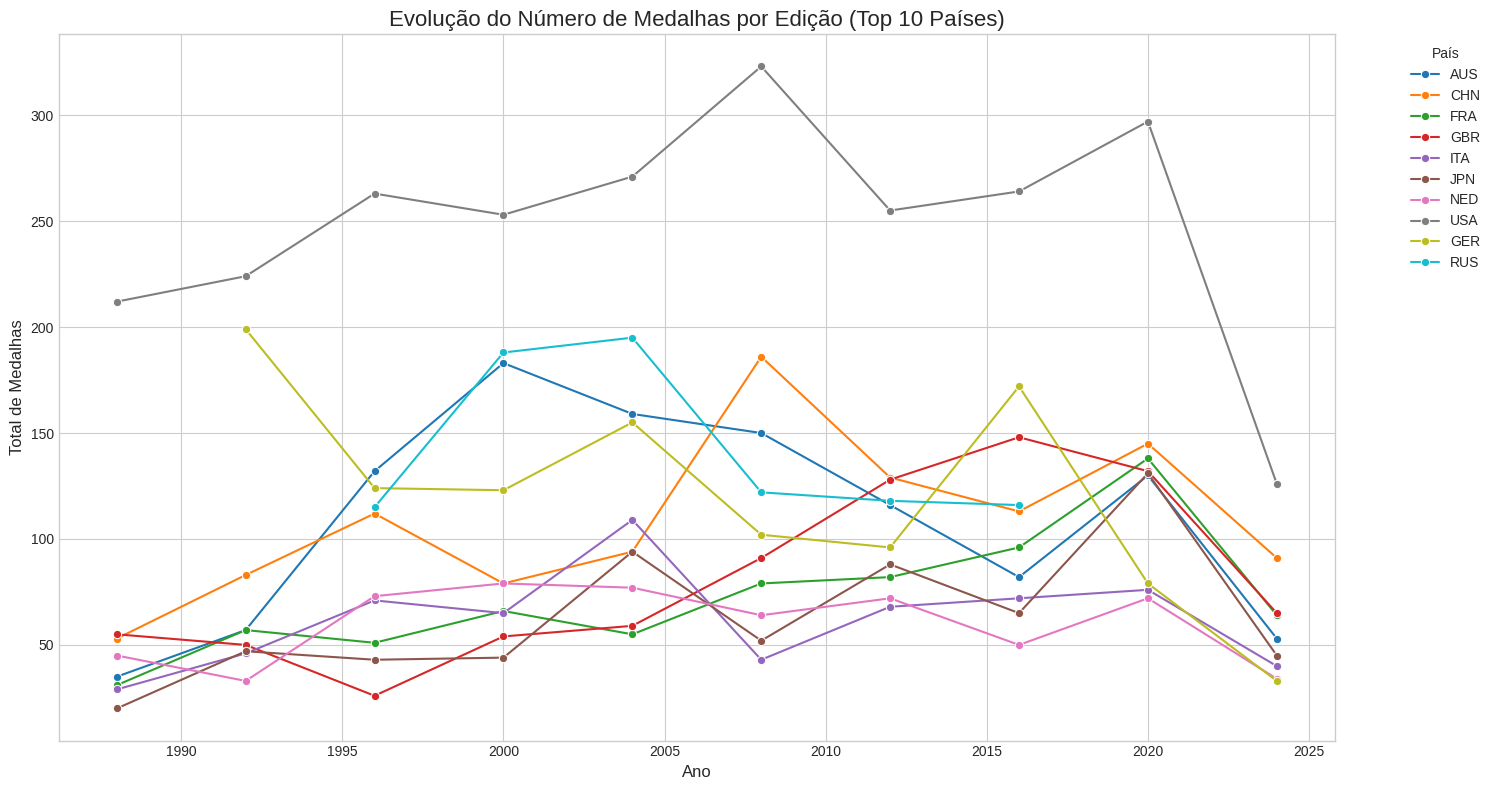

Metadados da análise de medalhas salvos.


In [ ]:
# @title 5. Análise de Medalhas (Camada Gold)
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import json

# --- Carregar dados da camada Bronze ---
df_medalhas = pd.read_parquet('olympics-datalake/bronze/medalhas_1986_2024.parquet')

# --- 5.1 Estatísticas ---
# Total de medalhas por país no período
total_por_pais = df_medalhas.groupby('pais')['total_medalhas'].sum().sort_values(ascending=False).reset_index()

# Média de medalhas por edição para os top 10 países
top_10_paises = total_por_pais['pais'].head(10).tolist()
media_por_edicao = df_medalhas[df_medalhas['pais'].isin(top_10_paises)]
media_por_edicao = media_por_edicao.groupby('pais')['total_medalhas'].mean().sort_values(ascending=False).reset_index()
media_por_edicao = media_por_edicao.rename(columns={'total_medalhas': 'media_medalhas_por_edicao'})

# Salvar tabela-resumo
summary_path = 'olympics-datalake/gold/analise_medalhas/medalhas_summary.csv'
total_por_pais.to_csv(summary_path, index=False)
print(f"Tabela resumo salva em: {summary_path}")
print("\nTotal de Medalhas por País (1986-2024) - Top 10:")
print(total_por_pais.head(10))
print("\nMédia de Medalhas por Edição (Top 10 Países):")
print(media_por_edicao)

# --- 5.2 Visualização ---
df_plot = df_medalhas[df_medalhas['pais'].isin(top_10_paises)]

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=df_plot, x='ano', y='total_medalhas', hue='pais', marker='o', ax=ax)

ax.set_title('Evolução do Número de Medalhas por Edição (Top 10 Países)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Total de Medalhas', fontsize=12)
ax.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Salvar o gráfico
plot_path = 'olympics-datalake/gold/analise_medalhas/medalhas_plot.png'
plt.savefig(plot_path)
print(f"\nGráfico salvo em: {plot_path}")
plt.show()


# --- 5.3 Metadados da Análise ---
gold_meta_medalhas = {
    "Nome da Análise": "Evolução da Distribuição de Medalhas por País",
    "Pergunta Respondida": "1. Como evoluiu a distribuição de medalhas por país desde 1986 até Paris 2024?",
    "Arquivos Gerados": ["medalhas_summary.csv", "medalhas_plot.png"],
    "Descrição": "Análise da quantidade total e evolução de medalhas dos países com maior destaque histórico.",
    "Data da Análise": date.today().strftime("%Y-%m-%d")
}
with open('olympics-datalake/gold/analise_medalhas/metadata.json', 'w', encoding='utf-8') as f:
    json.dump(gold_meta_medalhas, f, indent=4, ensure_ascii=False)

print("Metadados da análise de medalhas salvos.")

Tabela resumo de crescimento salva em: olympics-datalake/gold/analise_modalidades/modalidades_summary.csv

Modalidades com Maior Crescimento em Nº de Participantes (1988 vs 2024):
       modalidade  participantes_1988  participantes_2024  crescimento_abs
3       athletics                1681                2020              339
12       football                 314                 553              239
21       swimming                 638                 853              215
4       badminton                  32                 175              143
26     water polo                 156                 286              130
14         hockey                 320                 415               95
13       handball                 300                 386               86
15           judo                 296                 378               82
25     volleyball                 240                 311               71
9   cycling track                 171                 235             

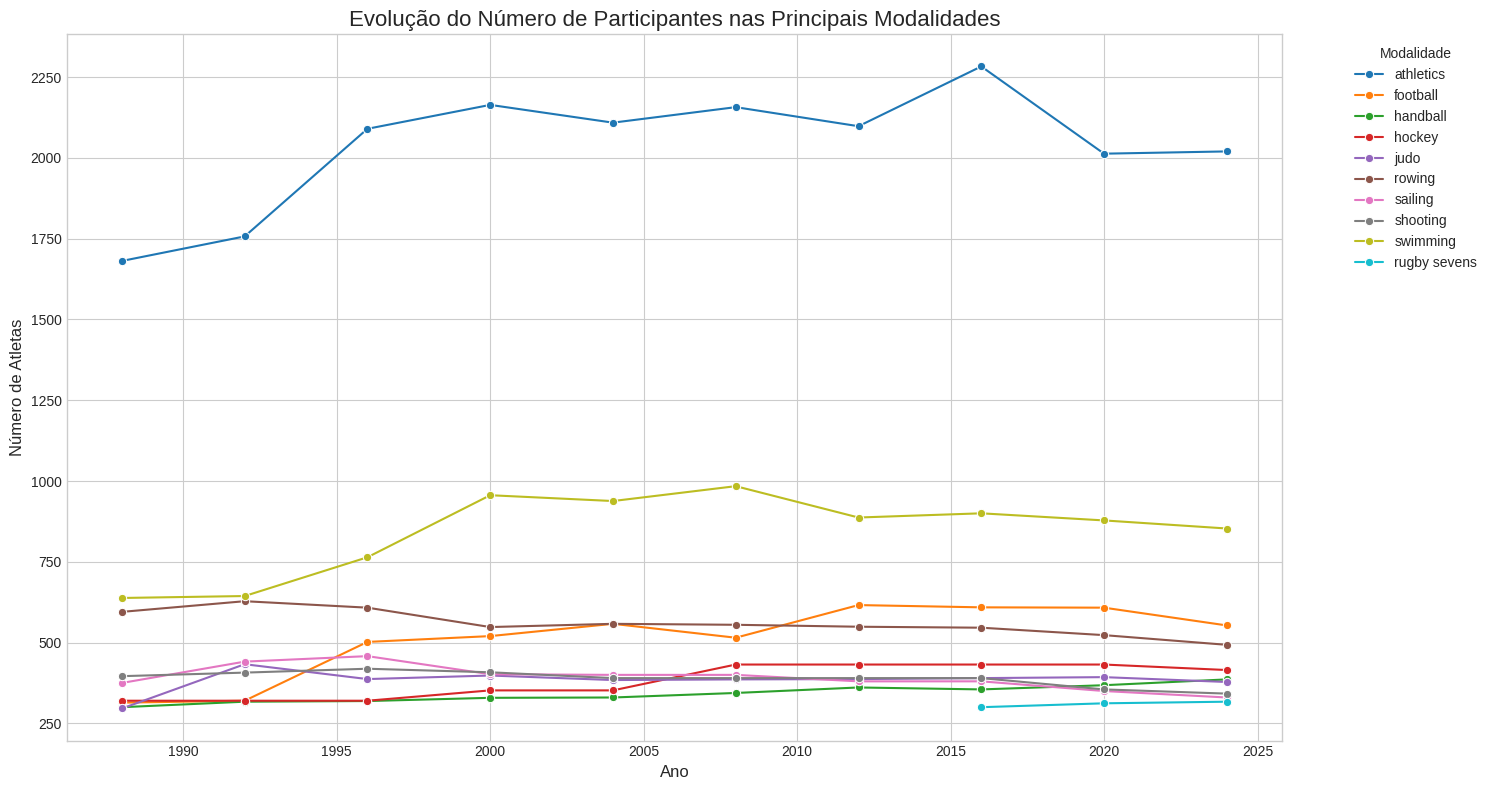

Metadados da análise de modalidades salvos.


In [ ]:
# @title 6. Análise de Modalidades (Camada Gold)
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import json

# --- Carregar dados da camada Bronze ---
df_participantes = pd.read_parquet('olympics-datalake/bronze/participantes_1986_2024.parquet')

# --- Padroniza a coluna 'modalidade' para garantir que as comparações funcionem ---
df_participantes['modalidade'] = df_participantes['modalidade'].str.lower().str.strip()

# --- 6.1 Análise de Crescimento (para a Tabela) ---
# Esta parte continua a mesma para responder à pergunta original sobre o maior crescimento
part_1988 = df_participantes[df_participantes['ano'] == 1988].rename(columns={'num_participantes': 'participantes_1988'})
part_2024 = df_participantes[df_participantes['ano'] == 2024].rename(columns={'num_participantes': 'participantes_2024'})
df_growth = pd.merge(part_1988[['modalidade', 'participantes_1988']],
                     part_2024[['modalidade', 'participantes_2024']],
                     on='modalidade',
                     how='inner')
df_growth['crescimento_abs'] = df_growth['participantes_2024'] - df_growth['participantes_1988']
df_growth_sorted = df_growth.sort_values(by='crescimento_abs', ascending=False)

# Salvar e exibir a tabela-resumo
summary_path = 'olympics-datalake/gold/analise_modalidades/modalidades_summary.csv'
df_growth_sorted.to_csv(summary_path, index=False)
print(f"Tabela resumo de crescimento salva em: {summary_path}")
print("\nModalidades com Maior Crescimento em Nº de Participantes (1988 vs 2024):")
print(df_growth_sorted.head(10))


# --- 6.2 Visualização da Evolução (Gráfico de Linha) ---
# As 10 modalidades com mais participantes em 2024
top_10_modalidades_2024 = df_participantes[df_participantes['ano'] == 2024].nlargest(10, 'num_participantes')['modalidade'].tolist()
df_line_plot = df_participantes[df_participantes['modalidade'].isin(top_10_modalidades_2024)]

# Cria o gráfico de linha
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))
sns.lineplot(data=df_line_plot, x='ano', y='num_participantes', hue='modalidade', marker='o', ax=ax)

ax.set_title('Evolução do Número de Participantes nas Principais Modalidades', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Atletas', fontsize=12)
ax.legend(title='Modalidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plot_path = 'olympics-datalake/gold/analise_modalidades/modalidades_evolution_plot.png'
plt.savefig(plot_path)
print(f"\nGráfico de evolução salvo em: {plot_path}")
plt.show()

# --- 6.3 Metadados da Análise ---
gold_meta_modalidades = {
    "Nome da Análise": "Crescimento e Evolução de Modalidades por Participantes",
    "Pergunta Respondida": "2. Quais modalidades mais cresceram e como evoluiu a participação nas principais?",
    "Arquivos Gerados": ["modalidades_summary.csv", "modalidades_evolution_plot.png"],
    "Descrição": "Tabela com o crescimento absoluto de participantes (1988 vs 2024) e gráfico de linha mostrando a evolução do número de atletas nas modalidades mais populares.",
    "Data da Análise": date.today().strftime("%Y-%m-%d")
}
with open('olympics-datalake/gold/analise_modalidades/metadata.json', 'w', encoding='utf-8') as f:
    json.dump(gold_meta_modalidades, f, indent=4, ensure_ascii=False)

In [ ]:
# @title Célula de Diagnóstico (Comparar Nomes das Modalidades)
import pandas as pd

df_participantes = pd.read_parquet('olympics-datalake/bronze/participantes_1986_2024.parquet')

# Padronizar os nomes
df_participantes['modalidade'] = df_participantes['modalidade'].str.lower().str.strip()

# Separar os dados por ano
part_1988 = df_participantes[df_participantes['ano'] == 1988]
part_2024 = df_participantes[df_participantes['ano'] == 2024]

# Obter listas únicas e ordenadas de modalidades para cada ano
modalidades_1988 = sorted(part_1988['modalidade'].unique())
modalidades_2024 = sorted(part_2024['modalidade'].unique())

print("\n--- MODALIDADES EM 1988 ---")
print(f"Total: {len(modalidades_1988)} modalidades")
print(modalidades_1988)

print("\n\n--- MODALIDADES EM 2024 ---")
print(f"Total: {len(modalidades_2024)} modalidades")
print(modalidades_2024)

modalidades_comuns = set(modalidades_1988).intersection(set(modalidades_2024))
print("\n\n--- MODALIDADES EM COMUM (Após Padronização) ---")
print(f"Encontradas: {len(modalidades_comuns)} modalidades em comum")
print(sorted(list(modalidades_comuns)))


--- MODALIDADES EM 1988 ---
Total: 34 modalidades
['archery', 'artistic gymnastics', 'artistic swimming', 'athletics', 'badminton', 'baseball', 'basketball', 'bowling', 'boxing', 'canoe sprint', 'cycling road', 'cycling track', 'diving', 'equestrian dressage', 'equestrian eventing', 'equestrian jumping', 'fencing', 'football', 'handball', 'hockey', 'judo', 'modern pentathlon', 'rhythmic gymnastics', 'rowing', 'sailing', 'shooting', 'swimming', 'table tennis', 'taekwondo', 'tennis', 'volleyball', 'water polo', 'weightlifting', 'wrestling']


--- MODALIDADES EM 2024 ---
Total: 45 modalidades
['3x3 basketball', 'archery', 'artistic gymnastics', 'artistic swimming', 'athletics', 'badminton', 'basketball', 'beach volleyball', 'boxing', 'breaking', 'canoe slalom', 'canoe sprint', 'cycling bmx freestyle', 'cycling bmx racing', 'cycling mountain bike', 'cycling road', 'cycling track', 'diving', 'equestrian', 'fencing', 'football', 'golf', 'handball', 'hockey', 'judo', 'marathon swimming', 'mo

Tabela resumo salva em: olympics-datalake/gold/analise_genero/genero_summary.csv

Gráfico salvo em: olympics-datalake/gold/analise_genero/genero_plot.png


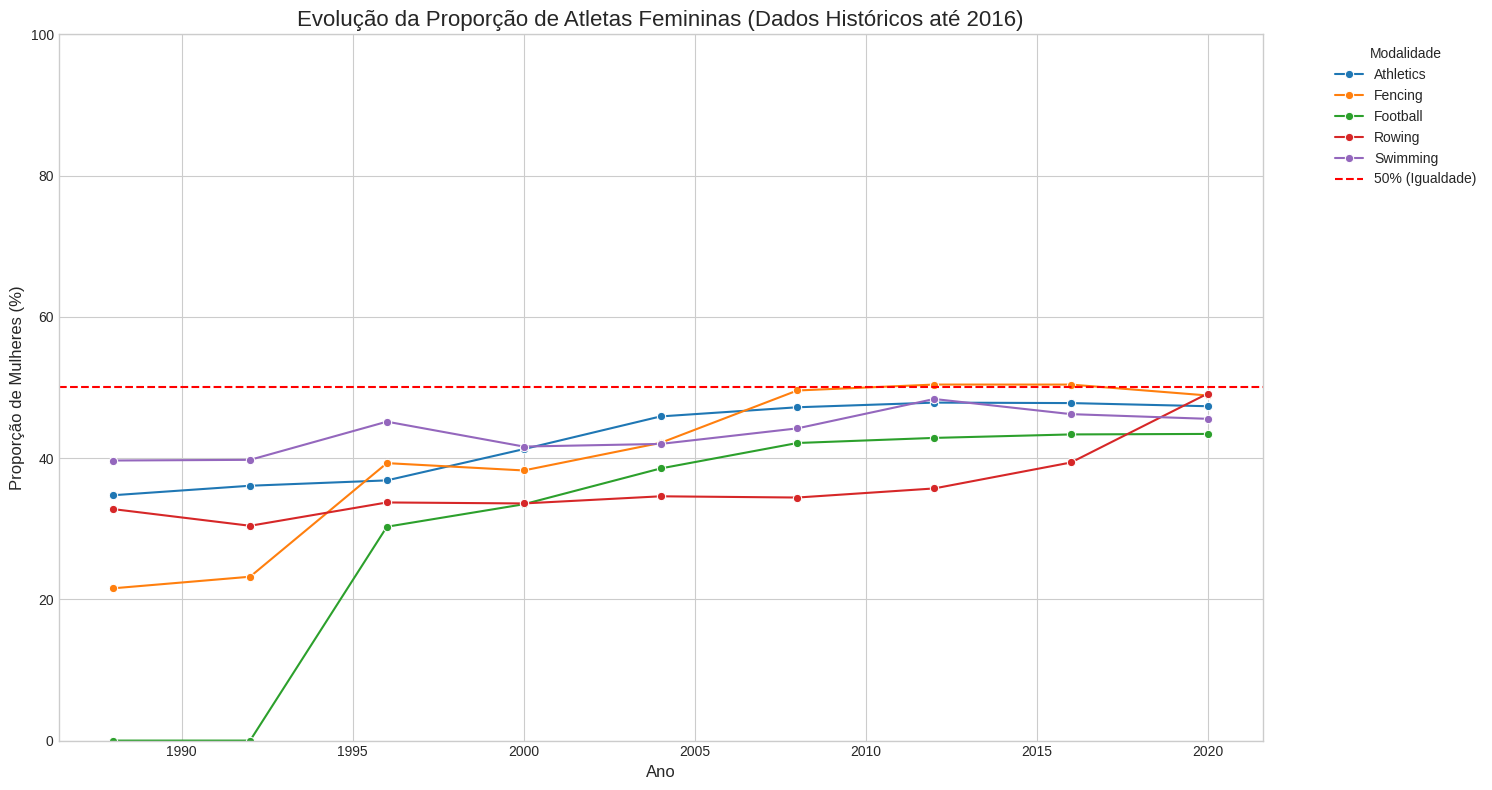

Metadados da análise de gênero salvos.


In [ ]:
# @title 7. Análise de Gênero (Camada Gold)
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import json

# --- Carregar dados da camada Bronze ---
df_genero = pd.read_parquet('olympics-datalake/bronze/genero_historico.parquet')

# Garantir que as colunas de gênero existam e preencher NaNs com 0
if 'Female' not in df_genero.columns: df_genero['Female'] = 0
if 'Male' not in df_genero.columns: df_genero['Male'] = 0
df_genero.fillna(0, inplace=True)

# --- 7.1 Estatísticas ---
# Calcular total de atletas e proporções
df_genero['total_atletas'] = df_genero['Male'] + df_genero['Female']
df_genero = df_genero[df_genero['total_atletas'] > 0] # Evitar divisão por zero
df_genero['prop_female'] = (df_genero['Female'] / df_genero['total_atletas']) * 100
df_genero['prop_male'] = (df_genero['Male'] / df_genero['total_atletas']) * 100

# Selecionar algumas modalidades principais para análise
principais_modalidades = ['Athletics', 'Swimming', 'Gymnastics', 'Fencing', 'Rowing', 'Football']
df_genero_main = df_genero[df_genero['modalidade'].isin(principais_modalidades)]

# Salvar tabela-resumo
summary_path = 'olympics-datalake/gold/analise_genero/genero_summary.csv'
df_genero_main.to_csv(summary_path, index=False)
print(f"Tabela resumo salva em: {summary_path}")

# --- 7.2 Visualização ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(15, 8))

sns.lineplot(data=df_genero_main, x='ano', y='prop_female', hue='modalidade', marker='o', ax=ax)

ax.axhline(50, color='red', linestyle='--', label='50% (Igualdade)')
ax.set_title('Evolução da Proporção de Atletas Femininas (Dados Históricos até 2016)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Proporção de Mulheres (%)', fontsize=12)
ax.set_ylim(0, 100)
ax.legend(title='Modalidade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


# Salvar o gráfico
plot_path = 'olympics-datalake/gold/analise_genero/genero_plot.png'
plt.savefig(plot_path)
print(f"\nGráfico salvo em: {plot_path}")
plt.show()

# --- 7.3 Metadados da Análise ---
gold_meta_genero = {
    "Nome da Análise": "Evolução da Proporção de Gênero",
    "Pergunta Respondida": "3. Como evoluiu a proporção de atletas por sexo nas principais modalidades?",
    "Arquivos Gerados": ["genero_summary.csv", "genero_plot.png"],
    "Descrição": "Análise da evolução percentual de atletas do sexo feminino em modalidades olímpicas selecionadas. Fonte: Apenas dados históricos até 2016.",
    "Data da Análise": date.today().strftime("%Y-%m-%d")
}
with open('olympics-datalake/gold/analise_genero/metadata.json', 'w', encoding='utf-8') as f:
    json.dump(gold_meta_genero, f, indent=4, ensure_ascii=False)

print("Metadados da análise de gênero salvos.")

In [ ]:
# @title 8. Verificação da Estrutura
# ------------------------------------------------------------------
!ls -R olympics-datalake/

olympics-datalake/:
bronze	gold  raw

olympics-datalake/bronze:
genero_historico.json	    paris2024_athletes.parquet
genero_historico.parquet    paris2024_medals.parquet
medalhas_1986_2024.json     participantes_1986_2024.json
medalhas_1986_2024.parquet  participantes_1986_2024.parquet
olympics_historico.parquet

olympics-datalake/gold:
analise_genero	analise_medalhas  analise_modalidades

olympics-datalake/gold/analise_genero:
genero_plot.png  genero_summary.csv  metadata.json

olympics-datalake/gold/analise_medalhas:
medalhas_plot.png  medalhas_summary.csv  metadata.json

olympics-datalake/gold/analise_modalidades:
metadata.json  modalidades_evolution_plot.png  modalidades_summary.csv

olympics-datalake/raw:
 olympics_historico_bio.csv	        paris2024_Judo.csv
 olympics_historico.json	       'paris2024_Marathon Swimming.csv'
 olympics_historico_results.csv         paris2024_medallists.csv
 olympics_paris2024.json	        paris2024_medals.csv
'paris2024_3x3 Basketball.csv'	        p

--- Análise 1: Evolução do Total de Medalhas do Brasil por Edição ---


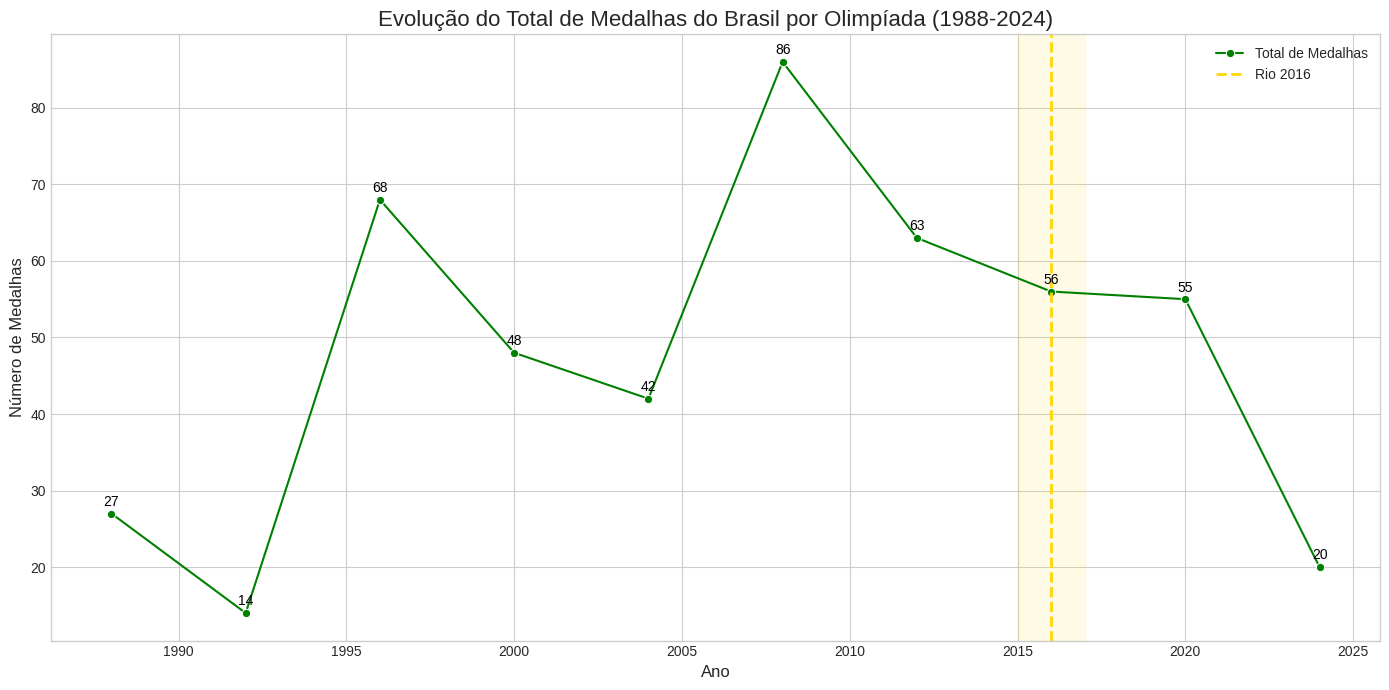


--- Análise 2: Modalidades que Mais Renderam Medalhas para o Brasil ---


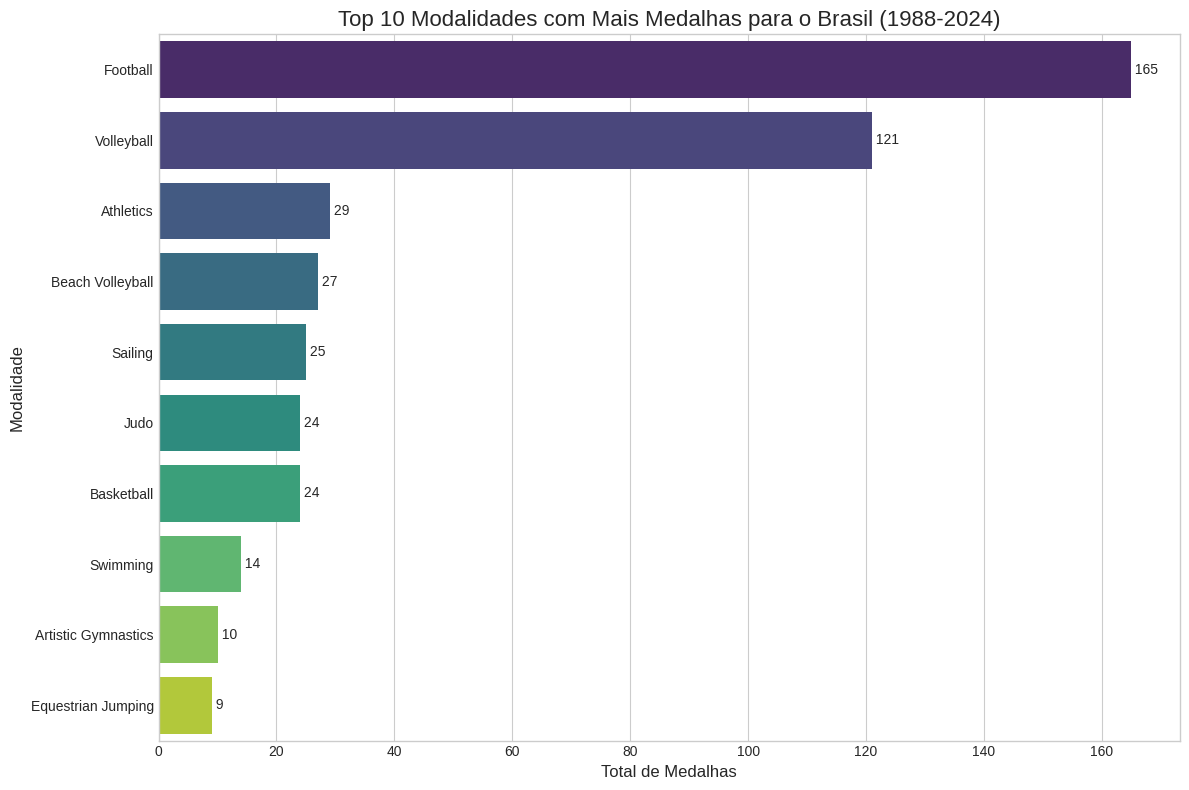

In [50]:
# @title 9. Análise Extra: Desempenho do Brasil nas Olimpíadas
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carregar dados consolidados da camada Bronze ---
df_medalhas_total = pd.read_parquet('olympics-datalake/bronze/medalhas_1986_2024.parquet')

# --- Gráfico 1: Evolução de Medalhas do Brasil ---
print("--- Análise 1: Evolução do Total de Medalhas do Brasil por Edição ---")
df_brasil_evo = df_medalhas_total[df_medalhas_total['pais'] == 'BRA'].sort_values('ano')

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plota a linha de evolução
sns.lineplot(data=df_brasil_evo, x='ano', y='total_medalhas', marker='o', color='green', label='Total de Medalhas', ax=ax)
# Adiciona os valores em cada ponto
for index, row in df_brasil_evo.iterrows():
    ax.text(row['ano'], row['total_medalhas'] + 1, int(row['total_medalhas']), color='black', ha="center")

# Destaca o "Efeito Rio 2016"
ax.axvline(x=2016, color='gold', linestyle='--', linewidth=2, label='Rio 2016')
ax.axvspan(2015, 2017, color='gold', alpha=0.1)

ax.set_title('Evolução do Total de Medalhas do Brasil por Olimpíada (1988-2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Medalhas', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()


# --- Gráfico 2: Modalidades com Mais Medalhas para o Brasil ---
print("\n--- Análise 2: Modalidades que Mais Renderam Medalhas para o Brasil ---")

# Dados Históricos
df_hist = pd.read_parquet('olympics-datalake/bronze/olympics_historico.parquet')
brasil_medals_hist = df_hist[(df_hist['pais'] == 'BRA') & (df_hist['medalha'].notna())]
# Dados de Paris 2024
df_paris_medals = pd.read_parquet('olympics-datalake/bronze/paris2024_medals.parquet')
brasil_medals_paris = df_paris_medals[df_paris_medals['country_code'] == 'BRA'].rename(columns={'discipline': 'modalidade'})

# Contagem de medalhas por modalidade
hist_counts = brasil_medals_hist['modalidade'].value_counts()
paris_counts = brasil_medals_paris['modalidade'].value_counts()

# Somar os resultados
total_counts = hist_counts.add(paris_counts, fill_value=0).sort_values(ascending=False).astype(int)

df_brasil_sports = total_counts.head(10).reset_index()
df_brasil_sports.columns = ['modalidade', 'total_medalhas']


fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_brasil_sports, x='total_medalhas', y='modalidade', palette='viridis', ax=ax)
ax.set_title('Top 10 Modalidades com Mais Medalhas para o Brasil (1988-2024)', fontsize=16)
ax.set_xlabel('Total de Medalhas', fontsize=12)
ax.set_ylabel('Modalidade', fontsize=12)

for index, value in enumerate(df_brasil_sports['total_medalhas']):
    ax.text(value, index, f' {value}', va='center')
plt.tight_layout()
plt.show()

--- Análise: Medalhas do Brasil em Esportes Individuais vs. Coletivos (1988-2016) ---


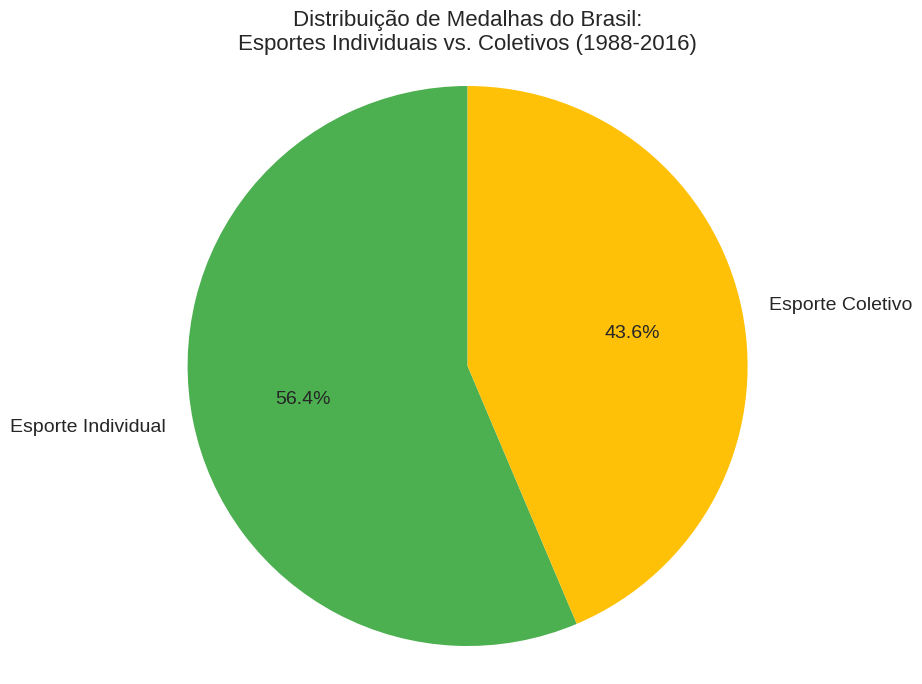

Esporte Individual    84
Esporte Coletivo      65
Name: count, dtype: int64


In [51]:
# @title 10. Análise Extra: Brasil - Força Coletiva vs. Talento Individual
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt

print("--- Análise: Medalhas do Brasil em Esportes Individuais vs. Coletivos (1988-2016) ---")

# coluna 'isTeamSport'
df_hist_results_raw = pd.read_csv('olympics-datalake/raw/olympics_historico_results.csv')

# Filtra apenas as medalhas do Brasil
brasil_medals_raw = df_hist_results_raw[
    (df_hist_results_raw['country_noc'] == 'BRA') &
    (df_hist_results_raw['medal'].notna())
].copy()

brasil_unique_events = brasil_medals_raw.drop_duplicates(subset=['edition', 'event', 'medal'])

# Conta o número de medalhas por tipo de esporte
team_vs_individual = brasil_unique_events['isTeamSport'].value_counts()
team_vs_individual.index = ['Esporte Individual', 'Esporte Coletivo']

# Gera o gráfico
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(team_vs_individual, labels=team_vs_individual.index, autopct='%1.1f%%',
       startangle=90, colors=['#4CAF50', '#FFC107'], textprops={'fontsize': 14})
ax.set_title('Distribuição de Medalhas do Brasil:\nEsportes Individuais vs. Coletivos (1988-2016)', fontsize=16)
ax.axis('equal')

plt.show()
print(team_vs_individual)

--- Análise Comparativa: Evolução do Total de Medalhas - Brasil vs. Cuba ---

Total de Medalhas (1988-2024):
pais
BRA    479
CUB    363
Name: total_medalhas, dtype: int64


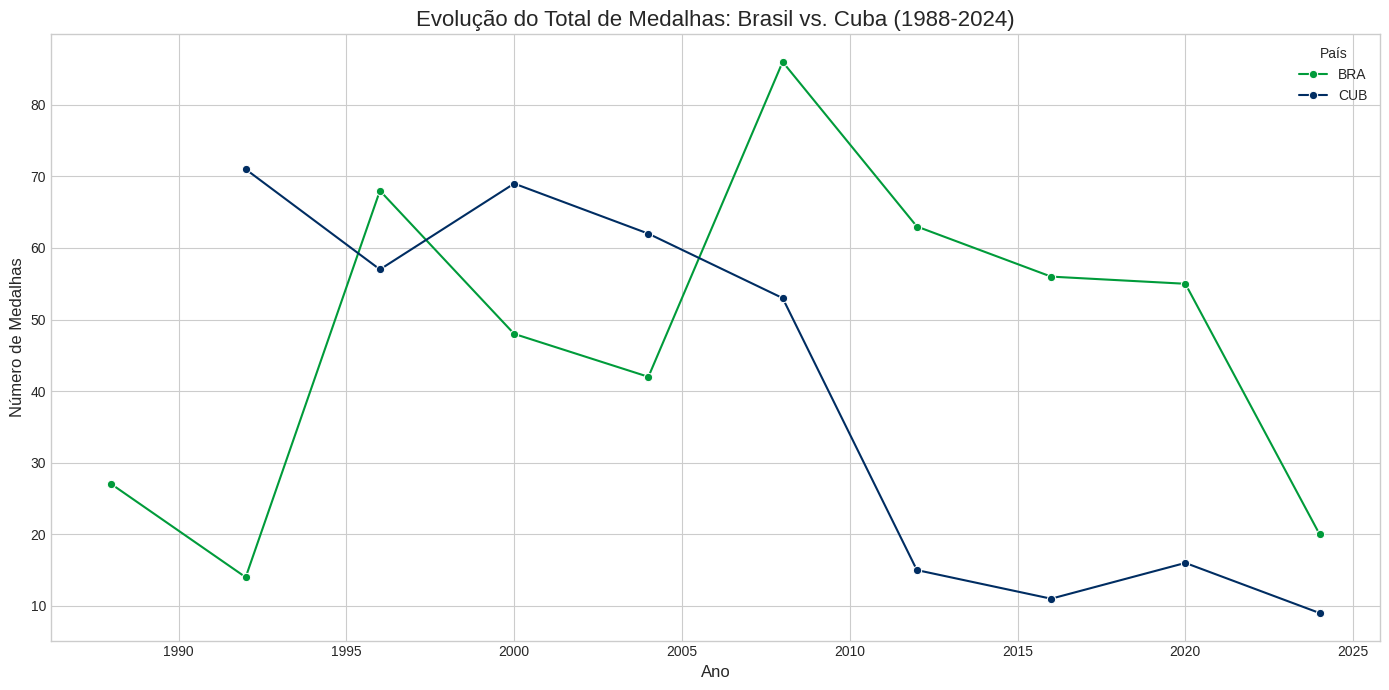


--- Confronto Direto: Medalhas por Modalidade ---


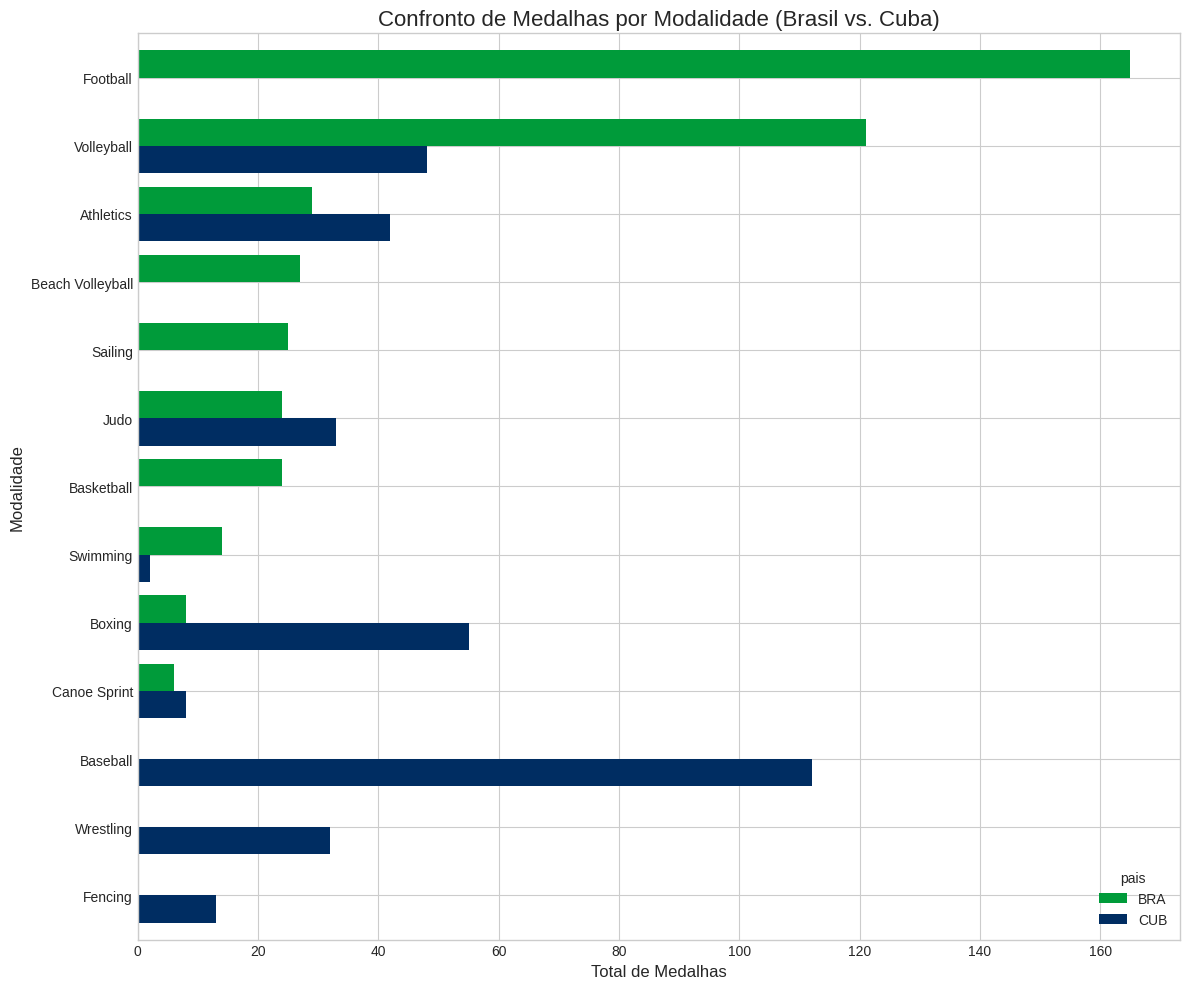

In [53]:
# @title 12. Análise Extra: Duelo de Gigantes - Brasil vs. Cuba
# ------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Carregar dados consolidados da camada Bronze ---
df_medalhas_total = pd.read_parquet('olympics-datalake/bronze/medalhas_1986_2024.parquet')

# --- 1. Resumo e Gráfico de Evolução ---
print("--- Análise Comparativa: Evolução do Total de Medalhas - Brasil vs. Cuba ---")

# Filtra os dados apenas para Brasil e Cuba
df_bra_cub = df_medalhas_total[df_medalhas_total['pais'].isin(['BRA', 'CUB'])].sort_values('ano')

# Calcula o total de medalhas no período para um resumo rápido
total_geral = df_bra_cub.groupby('pais')['total_medalhas'].sum()
print("\nTotal de Medalhas (1988-2024):")
print(total_geral)

# Gráfico de Linha Comparativo
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(14, 7))

sns.lineplot(data=df_bra_cub, x='ano', y='total_medalhas', hue='pais', marker='o',
             palette={'BRA': '#009B3A', 'CUB': '#002D62'}, ax=ax) # Cores do Brasil e Cuba

ax.set_title('Evolução do Total de Medalhas: Brasil vs. Cuba (1988-2024)', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Medalhas', fontsize=12)
ax.legend(title='País')
plt.tight_layout()
plt.show()


# --- 2. Confronto Direto por Modalidade ---
print("\n--- Confronto Direto: Medalhas por Modalidade ---")
# Dados Históricos
df_hist = pd.read_parquet('olympics-datalake/bronze/olympics_historico.parquet')
medals_hist = df_hist[(df_hist['pais'].isin(['BRA', 'CUB'])) & (df_hist['medalha'].notna())]
# Dados de Paris 2024
df_paris_medals = pd.read_parquet('olympics-datalake/bronze/paris2024_medals.parquet')
medals_paris = df_paris_medals[df_paris_medals['country_code'].isin(['BRA', 'CUB'])].rename(columns={'discipline': 'modalidade', 'country_code': 'pais'})

# Contagem de medalhas por país e modalidade
hist_counts = medals_hist.groupby(['pais', 'modalidade']).size()
paris_counts = medals_paris.groupby(['pais', 'modalidade']).size()

# Somar os resultados históricos e de Paris
total_sports_counts = hist_counts.add(paris_counts, fill_value=0).reset_index(name='total')

# Pivota a tabela para o formato: Modalidade | BRA | CUB
df_sports_pivot = total_sports_counts.pivot_table(index='modalidade', columns='pais', values='total').fillna(0)

# Seleciona apenas as modalidades mais relevantes para a comparação
# (Top 8 de cada país)
top_bra_sports = df_sports_pivot.nlargest(8, 'BRA').index
top_cub_sports = df_sports_pivot.nlargest(8, 'CUB').index
relevant_sports = top_bra_sports.union(top_cub_sports)

df_plot_sports = df_sports_pivot.loc[relevant_sports].sort_values(by=['BRA', 'CUB'], ascending=False)

# Gera o gráfico de barras agrupado
df_plot_sports.plot(kind='barh', figsize=(12, 10),
                    color={'BRA': '#009B3A', 'CUB': '#002D62'}, width=0.8)

plt.title('Confronto de Medalhas por Modalidade (Brasil vs. Cuba)', fontsize=16)
plt.xlabel('Total de Medalhas', fontsize=12)
plt.ylabel('Modalidade', fontsize=12)
plt.gca().invert_yaxis() # Coloca a modalidade com mais medalhas no topo
plt.tight_layout()
plt.show()